In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def generate_x(omega, t, x0=0):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        t: scalar float, time in s
        x0: scalar float, initial angle at t=0 in radians, default x0=0
    Outputs:
        x: scalar float, angle at t=t in radians, between [0, 2 pi)
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    x = x0 + omega*t
    x = np.mod(x,2*np.pi)
    epsilon = 10**-10 ## for floating points error in modulo
    
    if type(x) != np.ndarray:
        return x
    for i in range(len(x)):
        if x[i] > 2*np.pi - epsilon or x[i] < epsilon:
            x[i] = 0.0

    return x

In [17]:
def sample_x(omega, Fs, tfinal):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        Fs: (float) sampling rate in Hz
        tfinal: (float) final time in s
    Output:
        xs: (np array, 1D float) samples of x from t=0 to t=tfinal
        ts: (np array, 1D float) samples of t from t=0 to t=tfinal, sampled uniformly
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    
    ts = np.arange(0,tfinal,1/Fs)
    xs=generate_x(omega,ts)

    return xs, ts

In [18]:
r = 3
omega = 2*np.pi*(r+2)
Fs = 128
tfinal = 1

In [19]:
xs,ts = sample_x(omega , Fs, tfinal)

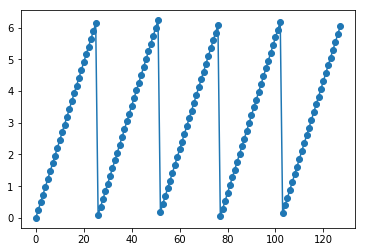

In [20]:
plt.plot(xs, 'o-')

In [21]:
s = []
for i in range(len(xs)):
    s.append((xs[i] , i))

In [22]:
np.random.seed(r+2)
np.random.shuffle(s)

In [23]:
N = 10

s_train = s[:N]
s_test = s[N:]

s_train.sort(key=lambda x:x[1])
s_test.sort(key=lambda x:x[1])

In [24]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for x in s_train:
    X_train.append(x[1])
    Y_train.append(x[0])
for x in s_test:
    X_test.append(x[1])
    Y_test.append(x[0])

Text(0.5, 1.0, 'S train')

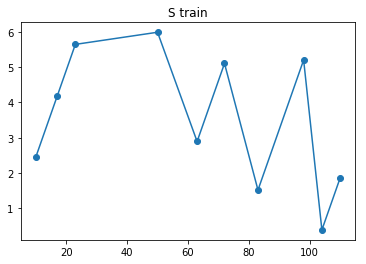

In [25]:
plt.plot(X_train, Y_train, 'o-')
plt.title('S train')

Text(0.5, 1.0, 'S test')

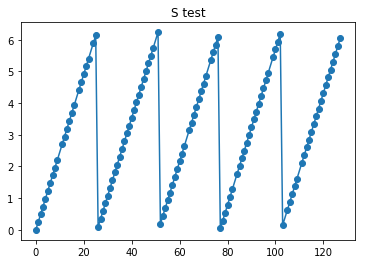

In [26]:
plt.plot(X_test, Y_test, 'o-')
plt.title('S test')

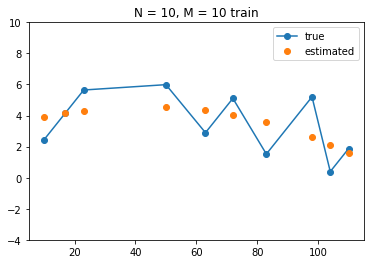

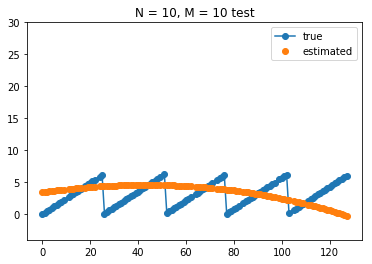

In [35]:
for M in [10]:

    X = []
    Y = []
    for x in X_train:
        x = x/128
        a = []
        for m in range(M+1):
            a.append(x**m)
        X.append(a)
    for y in Y_train:
        Y.append(y)

    X = np.array(X, dtype = 'float')
    Y = np.array(Y, dtype = 'float')

#     X = X/np.mean(X, axis = 0)
#     Y = Y/np.mean(Y, axis = 0)

    Xt = []
    Yt = []
    for x in X_test:
        x = x/128
        a = []
        for m in range(M+1):
            a.append(x**m)
        Xt.append(a)
    for y in Y_test:
        Yt.append(y)

    Xt = np.array(Xt)
    Yt = np.array(Yt)

#     Xt= Xt/np.mean(Xt, axis = 0)
#     Yt= Yt/np.mean(Yt, axis = 0)
    
#     W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)), X.transpose()) ,Y)
    W = np.random.rand(M+1)

    lamb = 0.1
    Wdot = np.ones(M+1)
    for i in range(M+1):
        if W[i] <0:
            Wdot[i] = -1.0

    Edot = -2* np.matmul(X.transpose(), (Y - np.matmul(X,W))) + lamb*Wdot

    lr = 0.01
    W_hat = W - lr*Edot

    c = 0
    eps = 10**(-5)
    while np.linalg.norm(W_hat - W) > eps:
        c+=1
        W = W_hat
        Wdot = np.ones(M+1)
        for i in range(M+1):
            if W[i] <0:
                Wdot[i] = -1.0
            if W[i] == 0:
                Wdot[i] = 0.0

        Edot = -2* np.matmul(X.transpose(), (Y - np.matmul(X,W))) + lamb*Wdot
        W_hat = W - lr*Edot

        if c > 10**(5):
            break
    

#     pred_train = LR.predict(X)
    pred_train = np.matmul(X,W)
    pred_test = np.matmul(Xt,W)

    #train
    plt.figure()
#     plt.subplot(121)
    plt.title("N = 10, M = " + str(M) + " train")
    plt.plot(X_train, Y_train, 'o-', label = "true")
    plt.plot(X_train, pred_train, 'o', label = "estimated")
    plt.legend()
    plt.ylim((-4,10))
    plt.show()

    #test
    plt.figure()
#     plt.subplot(122)
    plt.title("N = 10, M = " + str(M) + " test")
    plt.plot(X_test, Y_test, 'o-', label = "true")
    plt.plot(X_test, pred_test, 'o', label = "estimated")
    plt.legend()
    plt.ylim((-4,30))
    plt.show()
    
    print()
#     print("M change")
    print()

In [71]:
loss = []
ws = []

for lamb in np.arange(0,0.1,0.004):
    for M in [10]:

        X = []
        Y = []
        for x in X_train:
            x = x/128
            a = []
            for m in range(M+1):
                a.append(x**m)
            X.append(a)
        for y in Y_train:
            Y.append(y)

        X = np.array(X, dtype = 'float')
        Y = np.array(Y, dtype = 'float')

    #     X = X/np.mean(X, axis = 0)
    #     Y = Y/np.mean(Y, axis = 0)

        Xt = []
        Yt = []
        for x in X_test:
            x = x/128
            a = []
            for m in range(M+1):
                a.append(x**m)
            Xt.append(a)
        for y in Y_test:
            Yt.append(y)

        Xt = np.array(Xt)
        Yt = np.array(Yt)

    #     Xt= Xt/np.mean(Xt, axis = 0)
    #     Yt= Yt/np.mean(Yt, axis = 0)

    #     W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)), X.transpose()) ,Y)
        W = np.random.rand(M+1)

#         lamb = 0.06
        Wdot = np.ones(M+1)
        for i in range(M+1):
            if W[i] <0:
                Wdot[i] = -1.0

        Edot = -2* np.matmul(X.transpose(), (Y - np.matmul(X,W))) + lamb*Wdot

        lr = 0.01
        W_hat = W - lr*Edot

        c = 0
        eps = 10**(-5)
        while np.linalg.norm(W_hat - W) > eps:
            c+=1
            W = W_hat
            Wdot = np.ones(M+1)
            for i in range(M+1):
                if W[i] <0:
                    Wdot[i] = -1.0
                if W[i] == 0:
                    Wdot[i] = 0.0

            Edot = -2* np.matmul(X.transpose(), (Y - np.matmul(X,W))) + lamb*Wdot
            W_hat = W - lr*Edot

            if c > 10**(5):
                break

        pred_train = np.matmul(X,W)
        pred_test = np.matmul(Xt,W)
        
#         count = 0
#         for x in W:
#             if x < 10**(-4):
#                 count+=1
#         if count >= 6:
#             break
        
        
        ws.append(W)

        l = 0
        for x in (pred_train - Y_train):
            l = l + x*x
        loss.append(l/10)

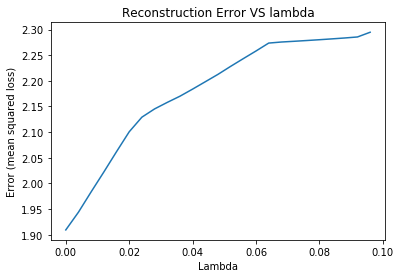

In [95]:
plt.figure()
plt.plot(np.arange(0,0.1,0.004), loss)
plt.title("Reconstruction Error VS lambda")
plt.xlabel("Lambda")
plt.ylabel("Error (mean squared loss)")
plt.show()

In [93]:
wsn.shape

(25, 11)

In [82]:
wsn = np.array(ws)

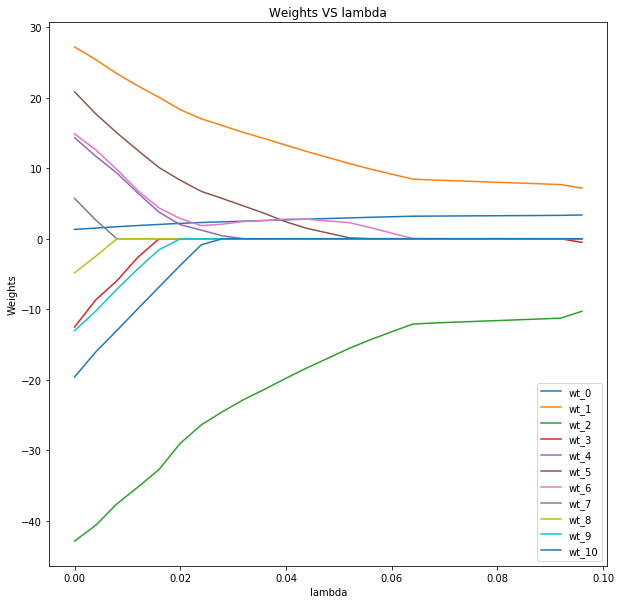

In [94]:
i = 0
plt.figure(figsize=(10,10))
for x in wsn.T:
    plt.plot(np.arange(0,0.1,0.004), x, label = 'wt_' + str(i))
    i+=1
plt.legend()
plt.xlabel("lambda")
plt.ylabel("Weights")
plt.title("Weights VS lambda")
plt.show()